In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys

In [2]:
def get_val(wsp, x):
    val = 0
    for i, elem in enumerate(wsp):
        val += elem * x ** i
    return val

In [3]:
def apr(X, Y, x, m):
    n = len(X)
    
    # macierz współczynników układu równań
    matrix = np.zeros((m + 1,m + 1))
    
    # macierz wyników układu równań
    wyn = np.zeros(m + 1)
    
    for i in range(m + 1):
        for j in range(m + 1):
            for val in X:
                matrix[i][j] += val ** (i + j)
        for k in range(n):
            wyn[i] += Y[k] * X[k] ** i
        
    # współczynniki wielomianów
    wsp = np.linalg.solve(matrix,wyn)
    
    ys = []
    for i in range(len(x)):
        ys+=[get_val(wsp, x[i])]

    return ys

In [4]:
def cal(a, b, x):
    wyn = a[0]/2
    for j in range(1,len(a)):
        wyn += a[j]*math.cos(j * x) + b[j]*math.sin(j * x)
    return wyn

In [60]:
def aprTryg(X, Y, x, m = -1):
    n = len(X)
    if m <= 2:
        m = (n - 1)//2
    a = np.zeros(m + 1)
    b = np.zeros(m + 1)
    for i in range(m):
        for j in range(n - 1):
            a[i] += Y[j]*math.cos(i * X[j])
        a[i] *= 2/n
        for j in range(n - 1):
            b[i] += Y[j]*math.sin(i * X[j])
        b[i] *= 2/n
    y = []
    for val in x:
        y += [cal(a,b,val)]
    return y

In [6]:
def czeb(k):
    return [(math.cos((2*j -1)/(2*k) * math.pi) + 1)/2 for j in range(1,k+1)]

In [7]:
def reg(k): # k rowno od 0 do 1
    return [x/(k - 1) for x in range(k)]

In [17]:
def scale(T,l,p): # z [o,1] a [l,p]
    return [x * (p-l) + l for x in T]

def scaleToPi(T, prevl,prevp): # z [prevl, prep] na [-pi,pi]
    return [(x - prevl) / (prevp - prevl) * 2 * math.pi - math.pi for x in T]

In [9]:
def f(x):
    k = 1
    m = 1
    return math.sin(m*x)*math.sin(k*x**2/math.pi)

In [54]:
def diff(Y_1,Y_2):
    diff=0
    for i in range(len(Y_2)):
        diff = max(diff,abs(Y_1[i]-Y_2[i]))
    return diff

def error(Y_1,Y_2):
    error = 0
    for i in range(len(Y_2)):
        error += (Y_1[i] - Y_2[i]) ** 2
    return error/len(Y_1)

In [55]:
points = 16
n = 3000
deg = 8

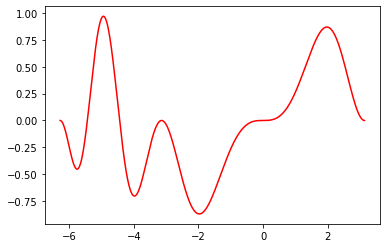

In [56]:
f_X = scale(reg(n),(-2) * math.pi,math.pi)
f_Y = [f(x) for x in f_X]

plt.plot(f_X,f_Y,'r-')

Max difference: 
0.6989676667979309
standard error: 
0.0754978549198625


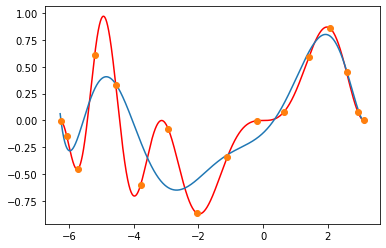

In [68]:
X = scale(czeb(points),(-2) * math.pi,math.pi)
Y = [f(x) for x in X]
X_A = scale(reg(n),(-2) * math.pi,math.pi)
Y_A = apr(X,Y,X_A,deg)

print("Max difference: ")
print(diff(f_Y,Y_A))
print("standard error: ")
print(error(f_Y,Y_A))

plt.plot(f_X,f_Y,'r-')
plt.plot(X_A,Y_A)
plt.plot(X,Y,'o')

Max difference: 
0.21845302128017863
standard error: 
0.007068752550187527


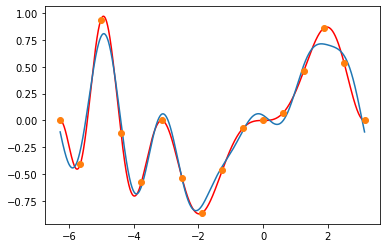

In [69]:
X = scale(reg(points),(-2) * math.pi,math.pi)
Y = [f(x) for x in X]
X_A = scale(reg(n),(-2) * math.pi,math.pi)
Y_A = aprTryg(scaleToPi(X, (-2) * math.pi,math.pi),Y,scaleToPi(X_A, (-2) * math.pi,math.pi))

print("Max difference: ")
print(diff(f_Y,Y_A))
print("standard error: ")
print(error(f_Y,Y_A))

plt.plot(f_X,f_Y,'r-')
plt.plot(X_A,Y_A)
plt.plot(X,Y,'o')

In [62]:
def differror(name,X,Y,f_X,f_Y,deg = -1):
    if name == "tryg":
        Y_A = aprTryg(scaleToPi(X, (-2) * math.pi,math.pi),Y,scaleToPi(f_X, (-2) * math.pi,math.pi))

        print("Max difference: ",end="")
        print(diff(f_Y,Y_A))
        print("standard error: ",end="")
        print(error(f_Y,Y_A))
    else:
        if deg < 2:
            deg = len(X)//2
        Y_A = apr(X,Y,f_X,deg)

        print("Max difference: ",end="")
        print(diff(f_Y,Y_A))
        print("standard error: ",end="")
        print(error(f_Y,Y_A))

In [63]:
X_A = scale(reg(n),(-2) * math.pi,math.pi)
deg = 8
for i in [3,4,5,7,10,15,20,30,50,100]:
    X = scale(reg(i),(-2) * math.pi,math.pi)
    Y = [f(x) for x in X]
    print("number of points:",end="")
    print(i)
    differror("pol",X,Y,X_A,f_Y,deg)

number of points:3
Max difference: 1.3497729279046604
standard error: 0.4484994809010939
number of points:4
Max difference: 0.9706681448431346
standard error: 0.24901525159303112
number of points:5
Max difference: 0.9952622688677675
standard error: 0.20951917648678525
number of points:7
Max difference: 1.3167333303663624
standard error: 0.16330244113438896
number of points:10
Max difference: 2.2907417808424917
standard error: 0.505770596131538
number of points:15
Max difference: 0.7159919869016953
standard error: 0.07597810873225896
number of points:20
Max difference: 0.6935551544373565
standard error: 0.07469901864503883
number of points:30
Max difference: 0.6834136882283438
standard error: 0.07440158061121989
number of points:50
Max difference: 0.6811267671982323
standard error: 0.07431821883777434
number of points:100
Max difference: 0.6803898306096977
standard error: 0.07425756085907707


In [64]:
X_A = scale(reg(n),(-2) * math.pi,math.pi)
for i in [3,4,5,7,10,15,20,30,50,100]:
    X = scale(reg(i),(-2) * math.pi,math.pi)
    Y = [f(x) for x in X]
    print("number of points:",end="")
    print(i)
    differror("tryg",X,Y,X_A,f_Y)

number of points:3
Max difference: 1.2063704052386504
standard error: 0.29934192958771755
number of points:4
Max difference: 0.9706681448431346
standard error: 0.24901525159303112
number of points:5
Max difference: 1.308764297776189
standard error: 0.19723906188953252
number of points:7
Max difference: 1.2262574609100487
standard error: 0.18060447153849027
number of points:10
Max difference: 0.9250809908879237
standard error: 0.1138099890841455
number of points:15
Max difference: 0.20850419885395494
standard error: 0.007950856716138231
number of points:20
Max difference: 0.09770578665005525
standard error: 0.0014332158391275618
number of points:30
Max difference: 0.03379832536503946
standard error: 0.0003130580999083367
number of points:50
Max difference: 0.01951325973378204
standard error: 0.00010143031768421808
number of points:100
Max difference: 0.009709148870935769
standard error: 2.4949318800510545e-05
